# Problem statement

We have data from a Portuguese bank on details of customers related to selling a term deposit
The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio

# Data dictionary

**Bank client data**
* 1 - age 
* 2 - job : type of job 
* 3 - marital : marital status
* 4 - education 
* 5 - default: has credit in default? 
* 6 - housing: has housing loan? 
* 7 - loan: has personal loan?
* 8 - balance in account

**Related to previous contact**
* 8 - contact: contact communication type
* 9 - month: last contact month of year
* 10 - day_of_week: last contact day of the week
* 11 - duration: last contact duration, in seconds*

**Other attributes**
* 12 - campaign: number of contacts performed during this campaign and for this client
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign
* 14 - previous: number of contacts performed before this campaign and for this client
* 15 - poutcome: outcome of the previous marketing campaign

**Output variable (desired target):has the client subscribed a term deposit?**

In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [48]:
#Read the dataset

bank_df = pd.read_csv("bank-additional-full.csv",sep = ';')

In [49]:
#Shape of the data

bank_df.shape

(41188, 21)

In [50]:
#Reading the dataset

bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
#Info about the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [52]:
#### this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

bank_df.drop(['duration'], inplace=True, axis=1)

#### Certain variables are more relevant if they are categorical variable than numerical variables. We will convert such categorical variables to numeric variabes

In [53]:
bank_df['pdays']=bank_df['pdays'].astype('category')
bank_df['y']=bank_df['y'].astype('category')

# Exploratory data analysis


## Univariate analysis - boxplot / histogram for numerical variables

<AxesSubplot:xlabel='age'>

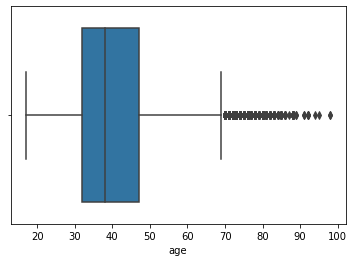

In [54]:
sns.boxplot(x=bank_df['age'], data=bank_df)

**Age column has some outliers. The median age is about 40 years. There are some customers above 90 years of age. This data might have to be checked**

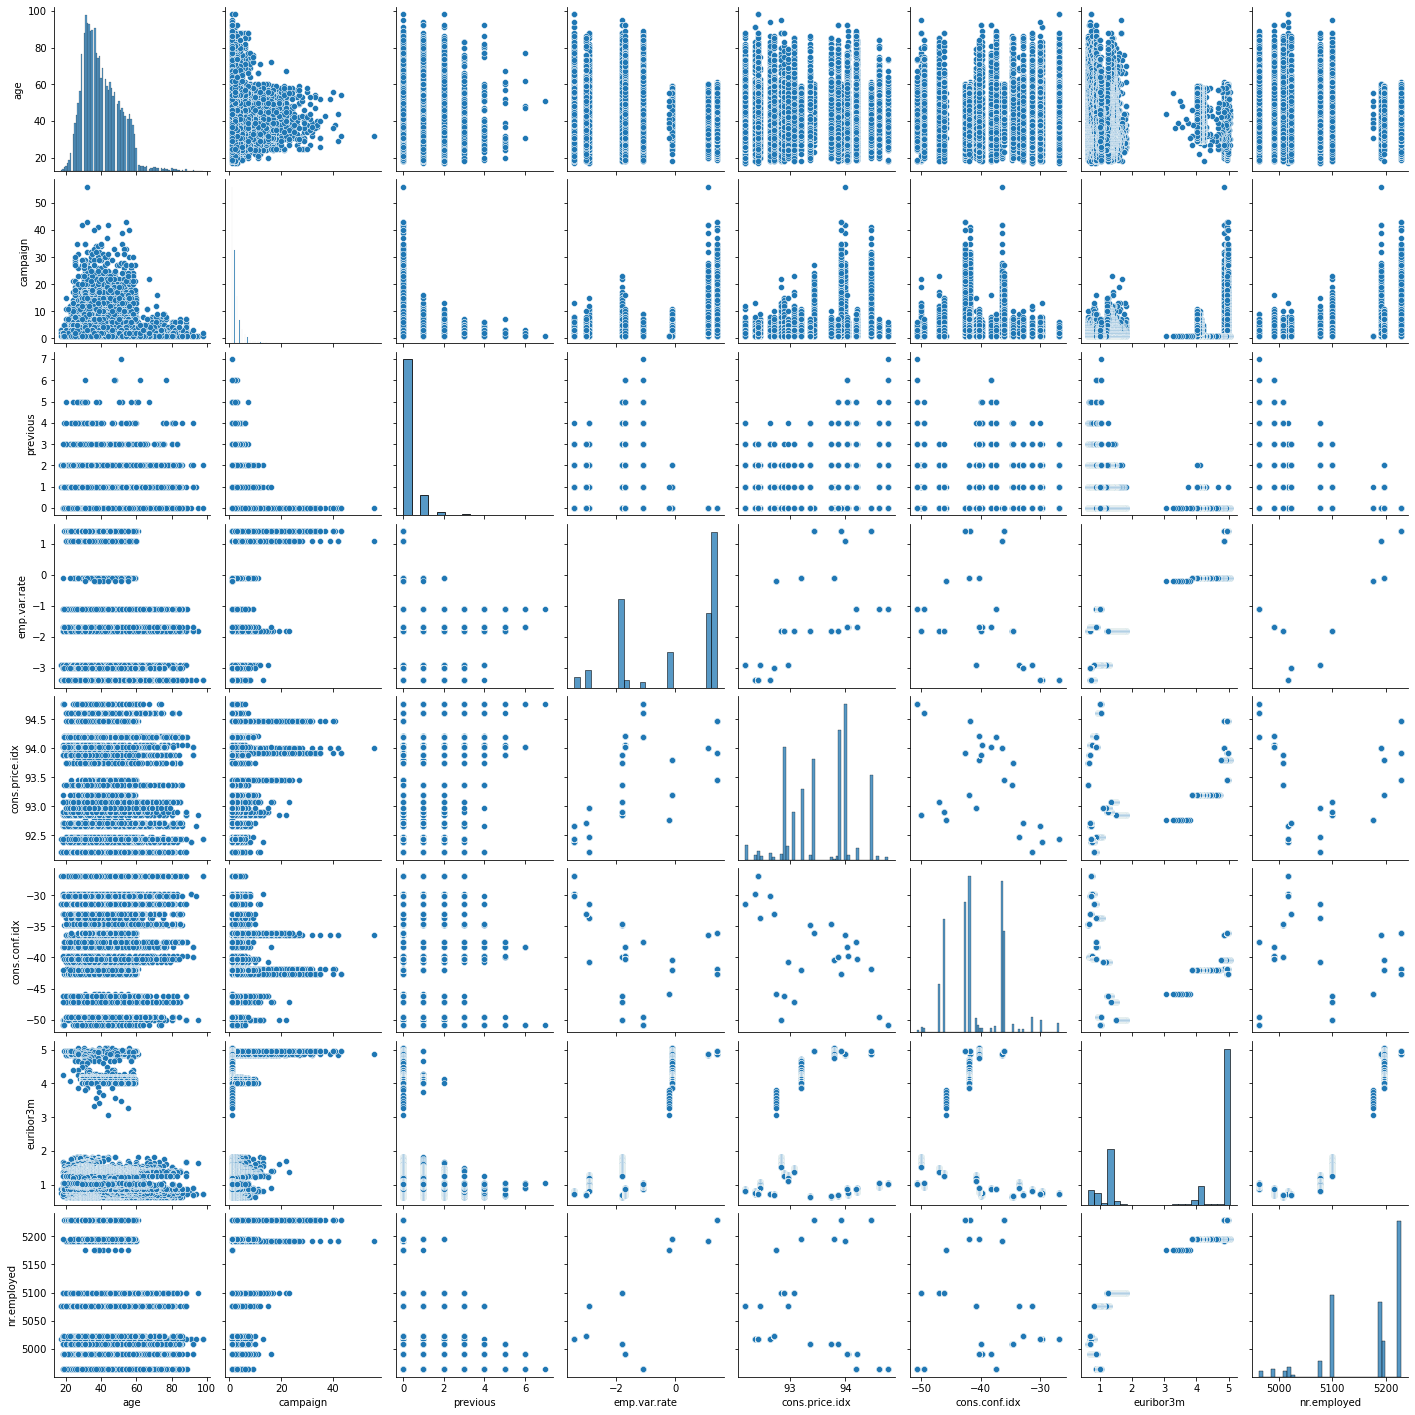

In [55]:
#histograms from the pair plots
sns.pairplot(bank_df)

**The distribution of all numerical variables other than age is highly skewed - hence we might want to transform or bin some of these variables**

**On similar lines, please perform univariate analysis of other numerical variables**

## Univariate analysis - countplot / value count for categorical variables


In [56]:
bank_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

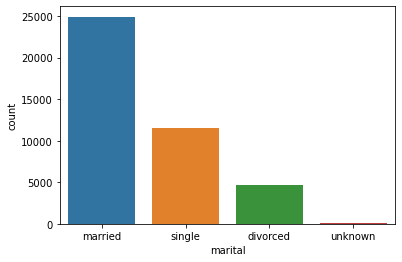

In [57]:
sns.countplot(bank_df['marital'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

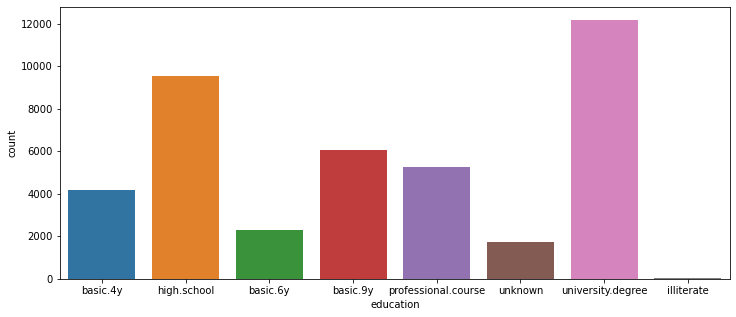

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(bank_df['education'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

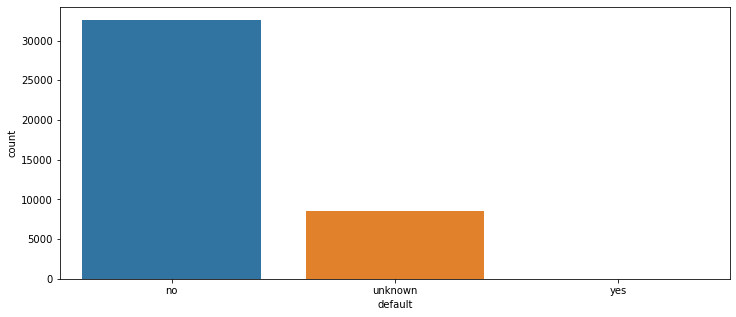

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(bank_df['default'])

**default - yes is a very very small % - we can consider deleting this column**[](http://)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

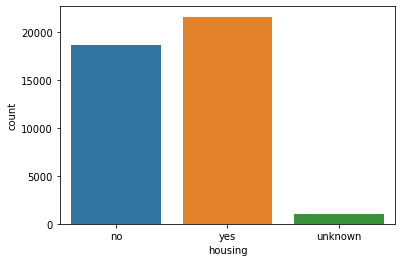

In [60]:
sns.countplot(bank_df['housing'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

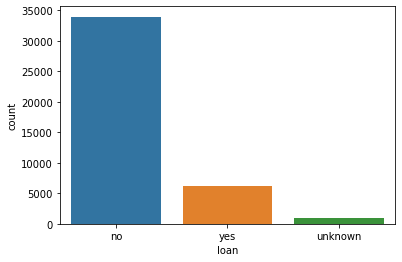

In [61]:
sns.countplot(bank_df['loan'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

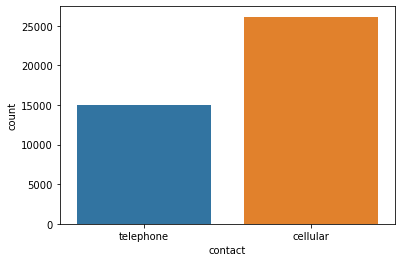

In [62]:
sns.countplot(bank_df['contact'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

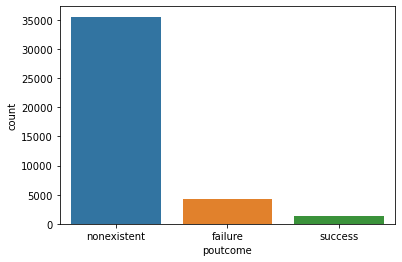

In [63]:
sns.countplot(bank_df['poutcome'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

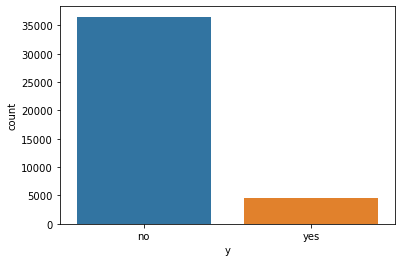

In [64]:
sns.countplot(bank_df['y'])

In [65]:
bank_df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

### The response rate is only 11.6%. Hence the Y variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure. 

### FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall

## Bivariate analysis

In [66]:
#Rename the dependant column from 'y ' to 'Target'
bank_df.rename(columns={'y':'Target'}, inplace=True)

In [67]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'Target'],
      dtype='object')

In [68]:
#Group numerical variables by mean for the classes of Y variable
np.round(bank_df.groupby(["Target"]).mean() ,1)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
Target,,,,,,,,
no,39.9,2.6,0.1,0.2,93.6,-40.6,3.8,5176.2
yes,40.9,2.1,0.5,-1.2,93.4,-39.8,2.1,5095.1


#### The mean balance is higher for customers who subscribe to the term deposit compared to those who dont


#### number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

#### number of contacts performed before this campaign is also higher for customers who subscribe

### All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit

In [69]:
### Bivariate analysis using crosstab

### Bivariate analysis using crosstab

In [70]:
pd.crosstab(bank_df['job'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
job,,
student,0.685714,0.314286
retired,0.747674,0.252326
unemployed,0.857988,0.142012
admin.,0.870274,0.129726
management,0.887825,0.112175
unknown,0.887879,0.112121
technician,0.891740,0.108260
self-employed,0.895144,0.104856
housemaid,0.900000,0.100000


#### The highest conversion is for students (31%) and lowest is for blue-collar(7%)

In [71]:
pd.crosstab(bank_df['marital'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
marital,,
unknown,0.850000,0.150000
single,0.859959,0.140041
divorced,0.896791,0.103209
married,0.898427,0.101573


In [72]:
pd.crosstab(bank_df['education'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
education,,
illiterate,0.777778,0.222222
unknown,0.854997,0.145003
university.degree,0.862755,0.137245
professional.course,0.886515,0.113485
high.school,0.891645,0.108355
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246


In [73]:
print(pd.crosstab(bank_df['default'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print(bank_df['default'].value_counts(normalize=True))

Target        no      yes
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


### Since default - yes is only 0.073% of the data and the conversion is also comparitively lower for default - yes, we can remove this column

In [74]:
bank_df.drop(['default'], axis=1, inplace=True)

In [75]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'Target'],
      dtype='object')

In [76]:
pd.crosstab(bank_df['housing'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
housing,,
yes,0.883806,0.116194
no,0.891204,0.108796
unknown,0.891919,0.108081


In [77]:
pd.crosstab(bank_df['loan'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.886598,0.113402
yes,0.890685,0.109315
unknown,0.891919,0.108081


In [78]:
pd.crosstab(bank_df['contact'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


In [79]:
pd.crosstab(bank_df['day_of_week'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )[0:10]

Target,no,yes
day_of_week,,
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671
fri,0.891913,0.108087
mon,0.900517,0.099483


In [80]:
pd.crosstab(bank_df['month'], bank_df['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
month,,
mar,0.494505,0.505495
dec,0.510989,0.489011
sep,0.550877,0.449123
oct,0.561281,0.438719
apr,0.795213,0.204787
aug,0.893979,0.106021
jun,0.894885,0.105115
nov,0.898561,0.101439
jul,0.909534,0.090466


### List out the high level findings from bivariate analysis that could provide pointers to feature selection


In [81]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [82]:
#Binning campaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
bank_df['campaign_range'] = binning(bank_df['campaign'], cut_points, labels)
bank_df['campaign_range'].value_counts()

<=2    28212
3       5341
>4      4984
4       2651
Name: campaign_range, dtype: int64

In [83]:
bank_df.drop(['campaign'], axis=1, inplace=True)
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Target',
       'campaign_range'],
      dtype='object')

In [84]:
X = bank_df.drop("Target" , axis=1)
y = bank_df["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pd.get_dummies(X, drop_first=True)

In [85]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [86]:
X_train.shape,X_test.shape

((28831, 77), (12357, 77))

In [87]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
# Is the model an overfit model? 
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

0.9931323922167111
0.8429230395727119


In [89]:
# Note: - Decision Tree is a non-parametric algorithm and hence prone to overfitting easily. This is evident from the difference
# in scores in training and testing

# In ensemble techniques, we want multiple instances (each different from the other) and each instance to be overfit!!!  
# hopefully, the different instances will do different mistakes in classification and when we club them, their
# errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors.

In [90]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


print(recall_score(y_test, y_pred,average="binary", pos_label="yes"))

[[9982 1037]
 [ 904  434]]
0.8429230395727119
0.3243647234678625


#### The recall score is relatively low and this has to be improves in the model


In [91]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Visualizing the tree

In [125]:
import graphviz
from sklearn.tree import export_graphviz

data = export_graphviz(clf_pruned,out_file=None,feature_names=feature_cols,class_names=['0','1'],   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

NameError: name 'feature_cols' is not defined

In [126]:
## Calculating feature importance
#feature_names=feature_cols
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

NameError: name 'feature_cols' is not defined

In [97]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)


In [98]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="yes")

In [99]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.90038,0.161435


### Overfitting is reduced after pruning, but recall has drastically reduced

In [115]:
## Apply the Random forest model and print the accuracy of Random forest Model


from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [101]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="yes")

In [102]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.900380,0.161435
0,Random Forest,0.892854,0.297459


In [114]:
## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.


from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [104]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='yes')

In [105]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.900380,0.161435
0,Random Forest,0.892854,0.297459
0,Adaboost,0.901351,0.184604


In [113]:
## Apply Bagging Classifier Algorithm and print the accuracy


from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [107]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='yes')

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.900380,0.161435
0,Random Forest,0.892854,0.297459
0,Adaboost,0.901351,0.184604
0,Bagging,0.891155,0.283259


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [110]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='yes')


In [111]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.900380,0.161435
0,Random Forest,0.892854,0.297459
0,Adaboost,0.901351,0.184604
0,Bagging,0.891155,0.283259
0,Gradient Boost,0.900218,0.231689


### Bagging gives overall best model performance. However, please note that the recall is still very low and will have to be improved